<h1><center>Chicago Crime Rate Data Analysis</center></h1>

# Introduction
<p>Crime is an inextricable aspect of our society; whether as a victim or as an offender, everyone has been exposed to it. 
In our study, we looked at crime data, and we chose the "Chicago Criminal dataset report," which contains crime episodes from 2001 to the present. We looked at crime patterns throughout time, as well as crime hotspots.</p>

# Dataset

From 2001 through 2020, the dataset used for this study comprises of crimes reported in the city of Chicago. Data is used from Kaggle datasets, however we may also use the CLEAR dataset from the Chicago Police Department (Citizen Law Enforcement Analysis and Reporting). It is one of the most comprehensive data sources available on the internet. For our study, the database comprises adequate information about the crime, such as the date, kind, description, and location.

### URL: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data

In [1]:
# import pyspark
from plotly.offline import plot
import pandas as pd
from plotly import express as pex
import ipywidgets as widgets
from IPython.display import display
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing the data

There are million entries of the crimes in the dataset. This volume of data necessitates quick and effective data processing. We chose the pandas framework because its in-memory processing capability makes dealing with large amounts of data simple. To reduce the processing time we removed few columns and included the columns that are reuired for our analysis.

In the below process we are including the list of columns we require and dropping of the remaining columns

In [2]:
chicago_file = './Dataset/Crimes_-_2001_to_Present.csv'
columns_to_read=["ID","Date","Primary Type","Location Description","Arrest","District","Year","Latitude","Longitude"]
chicago_df = pd.read_csv(chicago_file, usecols=columns_to_read)


In [3]:
chicago_df.head()


,ID,Date,Primary Type,Location Description,Arrest,District,Year,Latitude,Longitude
0,10224738,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,9.0,2015,41.815117,-87.670000
1,10224739,09/04/2015 11:30:00 AM,THEFT,CTA BUS,False,15.0,2015,41.895080,-87.765400
2,11646166,09/01/2018 12:01:00 AM,THEFT,RESIDENCE,False,6.0,2018,NaN,NaN
3,10224740,09/05/2015 12:45:00 PM,NARCOTICS,SIDEWALK,True,14.0,2015,41.937406,-87.716650
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,15.0,2015,41.881903,-87.755121


In the below process we are removing the filed with NaN values. WE are cleaning the dataset with unwanted data as shown below.

In [4]:
chicago_df = chicago_df.dropna()
chicago_df.count()

ID                      7358856
Date                    7358856
Primary Type            7358856
Location Description    7358856
Arrest                  7358856
District                7358856
Year                    7358856
Latitude                7358856
Longitude               7358856
dtype: int64

### Data Pre-processing: 
Grouping data based on year and district and counting value to calculate the graph of crime count in districts in Chicago.

In [5]:
crime_per_year = chicago_df.groupby('Year')['District'].value_counts()
crime_per_year

Year  District
2001  2.0         35055
      8.0         31214
      25.0        27839
      11.0        27573
      7.0         26523
                  ...  
2021  14.0         5747
      24.0         5630
      17.0         4761
      20.0         3516
      31.0           13
Name: District, Length: 484, dtype: int64

In [6]:
year = 2001
crime_per_year_df = pd.DataFrame(columns=['Year', 'District', 'Crime Count'])
for items in crime_per_year.iteritems():
    print(items[0][1])
    if items[0][1]!='No Result':
        print(items)
        win_series = pd.DataFrame({
            'Year': [items[0][0]],
            'District': [items[0][1]],
            'Crime Count': [items[1]]
        })
        crime_per_year_df = crime_per_year_df.append(win_series)
        year += 1 

2.0
((2001, 2.0), 35055)
8.0
((2001, 8.0), 31214)
25.0
((2001, 25.0), 27839)
11.0
((2001, 11.0), 27573)
7.0
((2001, 7.0), 26523)
6.0
((2001, 6.0), 25416)
4.0
((2001, 4.0), 24977)
12.0
((2001, 12.0), 24584)
3.0
((2001, 3.0), 24170)
9.0
((2001, 9.0), 23938)
19.0
((2001, 19.0), 22661)
14.0
((2001, 14.0), 22419)
18.0
((2001, 18.0), 22304)
15.0
((2001, 15.0), 20082)
5.0
((2001, 5.0), 19864)
10.0
((2001, 10.0), 19542)
16.0
((2001, 16.0), 15823)
24.0
((2001, 24.0), 15055)
22.0
((2001, 22.0), 14854)
1.0
((2001, 1.0), 14599)
17.0
((2001, 17.0), 14421)
20.0
((2001, 20.0), 9961)
8.0
((2002, 8.0), 31485)
11.0
((2002, 11.0), 29187)
7.0
((2002, 7.0), 27763)
25.0
((2002, 25.0), 27046)
2.0
((2002, 2.0), 25940)
4.0
((2002, 4.0), 25295)
6.0
((2002, 6.0), 24911)
9.0
((2002, 9.0), 24700)
12.0
((2002, 12.0), 23744)
3.0
((2002, 3.0), 22833)
19.0
((2002, 19.0), 22344)
14.0
((2002, 14.0), 21701)
18.0
((2002, 18.0), 21418)
15.0
((2002, 15.0), 19745)
10.0
((2002, 10.0), 19007)
5.0
((2002, 5.0), 18962)
1.0
((200

10.0
((2017, 10.0), 12368)
19.0
((2017, 19.0), 11715)
5.0
((2017, 5.0), 11616)
9.0
((2017, 9.0), 11594)
2.0
((2017, 2.0), 11376)
15.0
((2017, 15.0), 10091)
14.0
((2017, 14.0), 9854)
16.0
((2017, 16.0), 8699)
22.0
((2017, 22.0), 8217)
24.0
((2017, 24.0), 8025)
17.0
((2017, 17.0), 7767)
20.0
((2017, 20.0), 4467)
31.0
((2017, 31.0), 3)
11.0
((2018, 11.0), 18815)
6.0
((2018, 6.0), 16272)
8.0
((2018, 8.0), 16157)
18.0
((2018, 18.0), 15829)
1.0
((2018, 1.0), 15249)
7.0
((2018, 7.0), 14124)
4.0
((2018, 4.0), 13984)
25.0
((2018, 25.0), 13147)
12.0
((2018, 12.0), 12818)
10.0
((2018, 10.0), 12480)
19.0
((2018, 19.0), 11930)
3.0
((2018, 3.0), 11926)
5.0
((2018, 5.0), 11805)
2.0
((2018, 2.0), 11606)
9.0
((2018, 9.0), 10872)
15.0
((2018, 15.0), 9946)
14.0
((2018, 14.0), 9150)
16.0
((2018, 16.0), 8548)
22.0
((2018, 22.0), 8269)
24.0
((2018, 24.0), 7544)
17.0
((2018, 17.0), 7503)
20.0
((2018, 20.0), 4836)
31.0
((2018, 31.0), 10)
11.0
((2019, 11.0), 18598)
6.0
((2019, 6.0), 16754)
8.0
((2019, 8.0), 15

In [7]:
df_chicago_crime_per_disrict = pd.DataFrame(crime_per_year_df, columns=['Year', 'District', 'Crime Count'])
df_chicago_crime_per_disrict.reset_index(drop=True, inplace=True)
df_chicago_crime_per_disrict["Year"] = df_chicago_crime_per_disrict["Year"].astype(str)
df_chicago_crime_per_disrict["District"] = df_chicago_crime_per_disrict["District"].astype(int).astype(str)
df_chicago_crime_per_disrict["Crime Count"] = df_chicago_crime_per_disrict["Crime Count"].astype(str).astype(int)
df_chicago_crime_per_disrict['District'] = 'District ' + df_chicago_crime_per_disrict['District'].astype(str)

### Crime rate in Chicago districts over the years

In [33]:
# def crime_per_district_per_year()
fig=pex.bar(df_chicago_crime_per_disrict, x="District", y="Crime Count", color="District",animation_frame="Year", animation_group="District", range_y=[900,40000], title="Crime rate in Chicago districts over the years")
plot(fig)


'temp-plot.html'

### Data Cleaning
Cleaning and grouping data that resemble same type of crime to avoid unnecessary count in the types of crime and filter out the importnt ones.

In [9]:
def cleanDatasetPrimary(chicago_df):
    chicago_df[~chicago_df['Primary Type'].str.contains("NON")]
    chicago_df['Primary Type'].str.replace('OTHER NARCOTIC VIOLATION','NARCOTICS')
    chicago_df['Primary Type'].str.replace('INTIMIDATION','STALKING')
    chicago_df['Primary Type'].str.replace('PROSTITUTION','SEX OFFENSE')
    chicago_df['Primary Type'].str.replace('INTERFERENCE WITH PUBLIC OFFICER','PUBLIC PEACE VIOLATION')
    chicago_df['Primary Type'].str.replace('BURGLARY','ROBBERY')
    chicago_df['Primary Type'].str.replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT')
    chicago_df['Primary Type'].str.replace('CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE')
    chicago_df['Primary Type'].str.replace('CONCEALED CARRY LICENSE VIOLATION', 'OTHER OFFENSE')
    return chicago_df

In [10]:
chicago_df = cleanDatasetPrimary(chicago_df)
chicago_df.head()

,ID,Date,Primary Type,Location Description,Arrest,District,Year,Latitude,Longitude
0,10224738,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,9.0,2015,41.815117,-87.670000
1,10224739,09/04/2015 11:30:00 AM,THEFT,CTA BUS,False,15.0,2015,41.895080,-87.765400
3,10224740,09/05/2015 12:45:00 PM,NARCOTICS,SIDEWALK,True,14.0,2015,41.937406,-87.716650
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,15.0,2015,41.881903,-87.755121
5,10224742,09/05/2015 10:55:00 AM,BURGLARY,RESIDENCE,False,6.0,2015,41.744379,-87.658431


In [11]:
chicago_crime_df = chicago_df.groupby(['Year'])['Primary Type'].value_counts().unstack().reset_index()
chicago_crime_df.head()

Primary Type,Year,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,2001,1004.0,31260.0,93049.0,25943.0,NaN,1749.0,55590.0,14.0,13182.0,...,29558.0,6007.0,9.0,2732.0,8.0,18292.0,2155.0,202.0,98447.0,4246.0
1,2002,978.0,30733.0,91722.0,25221.0,NaN,1686.0,54708.0,14.0,13570.0,...,31805.0,6030.0,8.0,2357.0,2.0,17740.0,2056.0,192.0,95362.0,4149.0
2,2003,953.0,29291.0,87835.0,25010.0,NaN,1519.0,54694.0,14.0,14687.0,...,30912.0,6161.0,6.0,2417.0,2.0,17235.0,1995.0,245.0,97804.0,4199.0
3,2004,774.0,28792.0,86966.0,24517.0,NaN,1445.0,53069.0,22.0,15834.0,...,29455.0,7468.0,9.0,2491.0,1.0,15951.0,1722.0,214.0,94641.0,4283.0
4,2005,688.0,26965.0,83636.0,25413.0,NaN,1406.0,54351.0,16.0,16569.0,...,27828.0,6097.0,4.0,2721.0,1.0,15988.0,1708.0,190.0,84303.0,4074.0


In [12]:
chicago_crime_df.fillna(0)

Primary Type,Year,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,2001,1004.0,31260.0,93049.0,25943.0,0.0,1749.0,55590.0,14.0,13182.0,...,29558.0,6007.0,9.0,2732.0,8.0,18292.0,2155.0,202.0,98447.0,4246.0
1,2002,978.0,30733.0,91722.0,25221.0,0.0,1686.0,54708.0,14.0,13570.0,...,31805.0,6030.0,8.0,2357.0,2.0,17740.0,2056.0,192.0,95362.0,4149.0
2,2003,953.0,29291.0,87835.0,25010.0,0.0,1519.0,54694.0,14.0,14687.0,...,30912.0,6161.0,6.0,2417.0,2.0,17235.0,1995.0,245.0,97804.0,4199.0
3,2004,774.0,28792.0,86966.0,24517.0,0.0,1445.0,53069.0,22.0,15834.0,...,29455.0,7468.0,9.0,2491.0,1.0,15951.0,1722.0,214.0,94641.0,4283.0
4,2005,688.0,26965.0,83636.0,25413.0,0.0,1406.0,54351.0,16.0,16569.0,...,27828.0,6097.0,4.0,2721.0,1.0,15988.0,1708.0,190.0,84303.0,4074.0
5,2006,726.0,25929.0,80569.0,24304.0,0.0,1346.0,57074.0,23.0,14488.0,...,27046.0,6955.0,4.0,3063.0,7.0,15943.0,1504.0,185.0,85232.0,3816.0
6,2007,710.0,26305.0,79560.0,24838.0,0.0,1435.0,53713.0,25.0,13689.0,...,26828.0,6084.0,5.0,3313.0,1.0,15445.0,1478.0,212.0,84599.0,3547.0
7,2008,643.0,25269.0,75458.0,26010.0,0.0,1399.0,52197.0,13.0,12221.0,...,26116.0,5088.0,4.0,2993.0,0.0,16585.0,1388.0,185.0,86402.0,3824.0
8,2009,612.0,22615.0,67765.0,26495.0,0.0,1292.0,47253.0,13.0,10747.0,...,25247.0,3900.0,10.0,3122.0,0.0,15848.0,1165.0,162.0,79304.0,4079.0
9,2010,522.0,21534.0,65392.0,26421.0,0.0,1320.0,40648.0,14.0,9401.0,...,22007.0,2484.0,7.0,3538.0,0.0,14272.0,1109.0,189.0,76737.0,3704.0


In [13]:
crime_list = chicago_df['Primary Type'].unique()
crime_list = [x for x in crime_list if not x.startswith('NON')]
print(crime_list)

['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY', 'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER', 'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION', 'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT', 'LIQUOR LAW VIOLATION', 'ARSON', 'STALKING', 'KIDNAPPING', 'INTIMIDATION', 'HOMICIDE', 'CONCEALED CARRY LICENSE VIOLATION', 'HUMAN TRAFFICKING', 'OBSCENITY', 'CRIMINAL SEXUAL ASSAULT', 'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION', 'RITUALISM', 'DOMESTIC VIOLENCE']


In [14]:
def crime_per_Year_per_type(Type="ASSAULT"):
    fig = pex.line(chicago_crime_df, x="Year", y=Type, title='Crime Count based on the type of crime')
    plot(fig)

In [29]:
widgets.interact(crime_per_Year_per_type, Type = crime_list)

interactive(children=(Dropdown(description='Type', index=3, options=('BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT…

<function __main__.crime_per_Year_per_type(Type='ASSAULT')>

### Data Preprocessing
Here we are fetching months from the date column to analyse the arrest rate for various crimes over the month in a given year

In [16]:
chicago_df['Dates'] = pd.to_datetime(chicago_df['Date']).dt.date
chicago_df["Month"] = pd.DatetimeIndex(chicago_df['Dates']).month
chicago_df['Month'] = chicago_df['Month'].apply(lambda x: calendar.month_abbr[x])
chicago_df = chicago_df.drop(columns=['Dates'])

In [17]:
print(chicago_df.loc[chicago_df['Year'] == year])

Empty DataFrame
Columns: [ID, Date, Primary Type, Location Description, Arrest, District, Year, Latitude, Longitude, Month]
Index: []


In [18]:
chicago_df.head()

,ID,Date,Primary Type,Location Description,Arrest,District,Year,Latitude,Longitude,Month
0,10224738,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,9.0,2015,41.815117,-87.670000,Sep
1,10224739,09/04/2015 11:30:00 AM,THEFT,CTA BUS,False,15.0,2015,41.895080,-87.765400,Sep
3,10224740,09/05/2015 12:45:00 PM,NARCOTICS,SIDEWALK,True,14.0,2015,41.937406,-87.716650,Sep
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,15.0,2015,41.881903,-87.755121,Sep
5,10224742,09/05/2015 10:55:00 AM,BURGLARY,RESIDENCE,False,6.0,2015,41.744379,-87.658431,Sep


In [19]:
def plot_arrest_per_month(year):
    chicago_arrest_per_year_df = chicago_df.loc[chicago_df['Year'] == year]
    plt.style.use('bmh')

    fig, ax = plt.subplots(figsize=(20, 15))
    ax = sns.countplot(x="Month",
                       hue='Arrest',
                       data=chicago_arrest_per_year_df[['Month','Arrest']],
                       palette=['Red', 'Green'])
    months = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']    

    ax.set(title='Arrests Made per Month', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
    ax.set_xlabel("Month",fontsize=25)
    ax.set_ylabel("Number of Arrests",fontsize=25)
    plt.title('Arrests Made per Month over the selected year', fontdict={'fontsize': 30, 'color': 'black'}, weight="bold")
    plt.show()

In [20]:
year_list = chicago_df['Year'].unique()
year_list

array([2015, 2014, 2020, 2019, 2012, 2011, 2013, 2001, 2010, 2017, 2018,
       2016, 2008, 2007, 2009, 2006, 2005, 2002, 2003, 2004, 2021],
      dtype=int64)

In [21]:
widgets.interact(plot_arrest_per_month, year = year_list)

interactive(children=(Dropdown(description='year', options=(2015, 2014, 2020, 2019, 2012, 2011, 2013, 2001, 20…

<function __main__.plot_arrest_per_month(year)>

In [22]:
arrest_per_Year_heatmap_df = chicago_df.groupby(['Location Description','Year'])['Primary Type'].value_counts()
arrest_per_Year_heatmap_df

Location Description  Year  Primary Type     
ABANDONED BUILDING    2001  NARCOTICS            110
                            CRIMINAL TRESPASS     76
                            OTHER OFFENSE         61
                            CRIMINAL DAMAGE       52
                            BURGLARY              43
                                                ... 
YARD                  2020  HOMICIDE              28
                      2021  HOMICIDE              15
YMCA                  2001  HOMICIDE               1
                      2005  HOMICIDE               1
                      2018  HOMICIDE               1
Name: Primary Type, Length: 31034, dtype: int64

In [23]:
top_location_list = ['STREET','RESIDENCE','APARTMENT','SIDEWALK','ALLEY','RESTAURANT','VEHICLE NON-COMMERCIAL','GROCERY FOOD STORE','DEPARTMENT STORE','ABANDONED BUILDING','WAREHOUSE','OTHER']

In [24]:
crime_per_district_per_year_df = pd.DataFrame(columns=['Location','Year', 'Type'])
for items in arrest_per_Year_heatmap_df.iteritems():
    print(items[0][1])
    if items[0][0] in top_location_list:
        print(items)
        win_series = pd.DataFrame({
            'Location': [items[0][0]],
            'Year': [items[0][1]],
            'Type': [items[0][2]],
            
        })
        crime_per_district_per_year_df = crime_per_district_per_year_df.append(win_series)

2001
(('ABANDONED BUILDING', 2001, 'NARCOTICS'), 110)
2001
(('ABANDONED BUILDING', 2001, 'CRIMINAL TRESPASS'), 76)
2001
(('ABANDONED BUILDING', 2001, 'OTHER OFFENSE'), 61)
2001
(('ABANDONED BUILDING', 2001, 'CRIMINAL DAMAGE'), 52)
2001
(('ABANDONED BUILDING', 2001, 'BURGLARY'), 43)
2001
(('ABANDONED BUILDING', 2001, 'THEFT'), 42)
2001
(('ABANDONED BUILDING', 2001, 'CRIM SEXUAL ASSAULT'), 26)
2001
(('ABANDONED BUILDING', 2001, 'BATTERY'), 25)
2001
(('ABANDONED BUILDING', 2001, 'ARSON'), 20)
2001
(('ABANDONED BUILDING', 2001, 'WEAPONS VIOLATION'), 8)
2001
(('ABANDONED BUILDING', 2001, 'ROBBERY'), 6)
2001
(('ABANDONED BUILDING', 2001, 'HOMICIDE'), 4)
2001
(('ABANDONED BUILDING', 2001, 'SEX OFFENSE'), 4)
2001
(('ABANDONED BUILDING', 2001, 'ASSAULT'), 2)
2001
(('ABANDONED BUILDING', 2001, 'GAMBLING'), 1)
2001
(('ABANDONED BUILDING', 2001, 'KIDNAPPING'), 1)
2001
(('ABANDONED BUILDING', 2001, 'MOTOR VEHICLE THEFT'), 1)
2001
(('ABANDONED BUILDING', 2001, 'OFFENSE INVOLVING CHILDREN'), 1)
2001


2010
(('ABANDONED BUILDING', 2010, 'ROBBERY'), 11)
2010
(('ABANDONED BUILDING', 2010, 'PUBLIC PEACE VIOLATION'), 7)
2010
(('ABANDONED BUILDING', 2010, 'ASSAULT'), 4)
2010
(('ABANDONED BUILDING', 2010, 'HOMICIDE'), 4)
2010
(('ABANDONED BUILDING', 2010, 'PROSTITUTION'), 3)
2010
(('ABANDONED BUILDING', 2010, 'SEX OFFENSE'), 3)
2010
(('ABANDONED BUILDING', 2010, 'LIQUOR LAW VIOLATION'), 2)
2010
(('ABANDONED BUILDING', 2010, 'OFFENSE INVOLVING CHILDREN'), 1)
2011
(('ABANDONED BUILDING', 2011, 'NARCOTICS'), 312)
2011
(('ABANDONED BUILDING', 2011, 'BURGLARY'), 192)
2011
(('ABANDONED BUILDING', 2011, 'CRIMINAL TRESPASS'), 152)
2011
(('ABANDONED BUILDING', 2011, 'THEFT'), 139)
2011
(('ABANDONED BUILDING', 2011, 'CRIMINAL DAMAGE'), 78)
2011
(('ABANDONED BUILDING', 2011, 'CRIM SEXUAL ASSAULT'), 26)
2011
(('ABANDONED BUILDING', 2011, 'OTHER OFFENSE'), 26)
2011
(('ABANDONED BUILDING', 2011, 'BATTERY'), 22)
2011
(('ABANDONED BUILDING', 2011, 'WEAPONS VIOLATION'), 20)
2011
(('ABANDONED BUILDING', 201

2019
(('ABANDONED BUILDING', 2019, 'DECEPTIVE PRACTICE'), 1)
2019
(('ABANDONED BUILDING', 2019, 'PROSTITUTION'), 1)
2020
(('ABANDONED BUILDING', 2020, 'NARCOTICS'), 22)
2020
(('ABANDONED BUILDING', 2020, 'BURGLARY'), 19)
2020
(('ABANDONED BUILDING', 2020, 'THEFT'), 18)
2020
(('ABANDONED BUILDING', 2020, 'BATTERY'), 17)
2020
(('ABANDONED BUILDING', 2020, 'CRIMINAL DAMAGE'), 13)
2020
(('ABANDONED BUILDING', 2020, 'CRIMINAL TRESPASS'), 7)
2020
(('ABANDONED BUILDING', 2020, 'CRIMINAL SEXUAL ASSAULT'), 5)
2020
(('ABANDONED BUILDING', 2020, 'DECEPTIVE PRACTICE'), 4)
2020
(('ABANDONED BUILDING', 2020, 'OTHER OFFENSE'), 4)
2020
(('ABANDONED BUILDING', 2020, 'ROBBERY'), 4)
2020
(('ABANDONED BUILDING', 2020, 'WEAPONS VIOLATION'), 4)
2020
(('ABANDONED BUILDING', 2020, 'ARSON'), 3)
2020
(('ABANDONED BUILDING', 2020, 'ASSAULT'), 3)
2020
(('ABANDONED BUILDING', 2020, 'HOMICIDE'), 3)
2020
(('ABANDONED BUILDING', 2020, 'INTERFERENCE WITH PUBLIC OFFICER'), 1)
2021
(('ABANDONED BUILDING', 2021, 'CRIMINA

2004
(('ALLEY', 2004, 'PUBLIC PEACE VIOLATION'), 47)
2004
(('ALLEY', 2004, 'BURGLARY'), 40)
2004
(('ALLEY', 2004, 'LIQUOR LAW VIOLATION'), 39)
2004
(('ALLEY', 2004, 'HOMICIDE'), 28)
2004
(('ALLEY', 2004, 'INTERFERENCE WITH PUBLIC OFFICER'), 17)
2004
(('ALLEY', 2004, 'KIDNAPPING'), 16)
2004
(('ALLEY', 2004, 'OFFENSE INVOLVING CHILDREN'), 15)
2004
(('ALLEY', 2004, 'ARSON'), 14)
2004
(('ALLEY', 2004, 'INTIMIDATION'), 3)
2004
(('ALLEY', 2004, 'CRIMINAL SEXUAL ASSAULT'), 2)
2004
(('ALLEY', 2004, 'STALKING'), 2)
2004
(('ALLEY', 2004, 'OTHER NARCOTIC VIOLATION'), 1)
2005
(('ALLEY', 2005, 'NARCOTICS'), 3244)
2005
(('ALLEY', 2005, 'BATTERY'), 1957)
2005
(('ALLEY', 2005, 'ROBBERY'), 1122)
2005
(('ALLEY', 2005, 'CRIMINAL DAMAGE'), 928)
2005
(('ALLEY', 2005, 'THEFT'), 876)
2005
(('ALLEY', 2005, 'ASSAULT'), 641)
2005
(('ALLEY', 2005, 'MOTOR VEHICLE THEFT'), 381)
2005
(('ALLEY', 2005, 'WEAPONS VIOLATION'), 278)
2005
(('ALLEY', 2005, 'OTHER OFFENSE'), 153)
2005
(('ALLEY', 2005, 'SEX OFFENSE'), 104)
2

2011
(('ALLEY', 2011, 'PUBLIC INDECENCY'), 2)
2011
(('ALLEY', 2011, 'CRIMINAL SEXUAL ASSAULT'), 1)
2011
(('ALLEY', 2011, 'INTIMIDATION'), 1)
2011
(('ALLEY', 2011, 'OTHER NARCOTIC VIOLATION'), 1)
2012
(('ALLEY', 2012, 'NARCOTICS'), 2603)
2012
(('ALLEY', 2012, 'BATTERY'), 1288)
2012
(('ALLEY', 2012, 'ROBBERY'), 954)
2012
(('ALLEY', 2012, 'THEFT'), 673)
2012
(('ALLEY', 2012, 'CRIMINAL DAMAGE'), 588)
2012
(('ALLEY', 2012, 'ASSAULT'), 457)
2012
(('ALLEY', 2012, 'WEAPONS VIOLATION'), 273)
2012
(('ALLEY', 2012, 'MOTOR VEHICLE THEFT'), 210)
2012
(('ALLEY', 2012, 'OTHER OFFENSE'), 131)
2012
(('ALLEY', 2012, 'PUBLIC PEACE VIOLATION'), 109)
2012
(('ALLEY', 2012, 'CRIM SEXUAL ASSAULT'), 100)
2012
(('ALLEY', 2012, 'INTERFERENCE WITH PUBLIC OFFICER'), 77)
2012
(('ALLEY', 2012, 'DECEPTIVE PRACTICE'), 55)
2012
(('ALLEY', 2012, 'SEX OFFENSE'), 49)
2012
(('ALLEY', 2012, 'HOMICIDE'), 37)
2012
(('ALLEY', 2012, 'CRIMINAL TRESPASS'), 35)
2012
(('ALLEY', 2012, 'GAMBLING'), 30)
2012
(('ALLEY', 2012, 'LIQUOR L

2003
(('APARTMENT', 2003, 'PROSTITUTION'), 3)
2003
(('APARTMENT', 2003, 'LIQUOR LAW VIOLATION'), 2)
2003
(('APARTMENT', 2003, 'GAMBLING'), 1)
2003
(('APARTMENT', 2003, 'PUBLIC INDECENCY'), 1)
2004
(('APARTMENT', 2004, 'BATTERY'), 14756)
2004
(('APARTMENT', 2004, 'BURGLARY'), 6674)
2004
(('APARTMENT', 2004, 'CRIMINAL DAMAGE'), 4875)
2004
(('APARTMENT', 2004, 'OTHER OFFENSE'), 4766)
2004
(('APARTMENT', 2004, 'THEFT'), 3543)
2004
(('APARTMENT', 2004, 'ASSAULT'), 3138)
2004
(('APARTMENT', 2004, 'CRIMINAL TRESPASS'), 906)
2004
(('APARTMENT', 2004, 'DECEPTIVE PRACTICE'), 687)
2004
(('APARTMENT', 2004, 'OFFENSE INVOLVING CHILDREN'), 634)
2004
(('APARTMENT', 2004, 'NARCOTICS'), 559)
2004
(('APARTMENT', 2004, 'CRIM SEXUAL ASSAULT'), 346)
2004
(('APARTMENT', 2004, 'ROBBERY'), 304)
2004
(('APARTMENT', 2004, 'SEX OFFENSE'), 181)
2004
(('APARTMENT', 2004, 'WEAPONS VIOLATION'), 177)
2004
(('APARTMENT', 2004, 'PUBLIC PEACE VIOLATION'), 130)
2004
(('APARTMENT', 2004, 'ARSON'), 54)
2004
(('APARTMENT', 

2010
(('APARTMENT', 2010, 'ROBBERY'), 262)
2010
(('APARTMENT', 2010, 'SEX OFFENSE'), 175)
2010
(('APARTMENT', 2010, 'PUBLIC PEACE VIOLATION'), 100)
2010
(('APARTMENT', 2010, 'ARSON'), 50)
2010
(('APARTMENT', 2010, 'HOMICIDE'), 35)
2010
(('APARTMENT', 2010, 'KIDNAPPING'), 27)
2010
(('APARTMENT', 2010, 'MOTOR VEHICLE THEFT'), 25)
2010
(('APARTMENT', 2010, 'INTERFERENCE WITH PUBLIC OFFICER'), 23)
2010
(('APARTMENT', 2010, 'INTIMIDATION'), 22)
2010
(('APARTMENT', 2010, 'STALKING'), 22)
2010
(('APARTMENT', 2010, 'LIQUOR LAW VIOLATION'), 10)
2010
(('APARTMENT', 2010, 'PROSTITUTION'), 8)
2010
(('APARTMENT', 2010, 'OBSCENITY'), 5)
2010
(('APARTMENT', 2010, 'CRIMINAL SEXUAL ASSAULT'), 4)
2010
(('APARTMENT', 2010, 'GAMBLING'), 3)
2011
(('APARTMENT', 2011, 'BATTERY'), 14196)
2011
(('APARTMENT', 2011, 'BURGLARY'), 8910)
2011
(('APARTMENT', 2011, 'CRIMINAL DAMAGE'), 4703)
2011
(('APARTMENT', 2011, 'THEFT'), 4134)
2011
(('APARTMENT', 2011, 'OTHER OFFENSE'), 3265)
2011
(('APARTMENT', 2011, 'ASSAULT')

2016
(('APARTMENT', 2016, 'NON - CRIMINAL'), 1)
2017
(('APARTMENT', 2017, 'BATTERY'), 11695)
2017
(('APARTMENT', 2017, 'BURGLARY'), 3948)
2017
(('APARTMENT', 2017, 'CRIMINAL DAMAGE'), 3757)
2017
(('APARTMENT', 2017, 'THEFT'), 3615)
2017
(('APARTMENT', 2017, 'ASSAULT'), 2831)
2017
(('APARTMENT', 2017, 'OTHER OFFENSE'), 2424)
2017
(('APARTMENT', 2017, 'DECEPTIVE PRACTICE'), 1551)
2017
(('APARTMENT', 2017, 'CRIMINAL TRESPASS'), 662)
2017
(('APARTMENT', 2017, 'NARCOTICS'), 589)
2017
(('APARTMENT', 2017, 'OFFENSE INVOLVING CHILDREN'), 502)
2017
(('APARTMENT', 2017, 'CRIM SEXUAL ASSAULT'), 374)
2017
(('APARTMENT', 2017, 'WEAPONS VIOLATION'), 281)
2017
(('APARTMENT', 2017, 'ROBBERY'), 235)
2017
(('APARTMENT', 2017, 'SEX OFFENSE'), 137)
2017
(('APARTMENT', 2017, 'PUBLIC PEACE VIOLATION'), 83)
2017
(('APARTMENT', 2017, 'MOTOR VEHICLE THEFT'), 70)
2017
(('APARTMENT', 2017, 'HOMICIDE'), 46)
2017
(('APARTMENT', 2017, 'ARSON'), 36)
2017
(('APARTMENT', 2017, 'STALKING'), 27)
2017
(('APARTMENT', 2017

2003
2003
2003
2003
2003
2003
2003
2003
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015


2001
2001
2001
2001
2001
2001
2001
2001
2001
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2012
2012


2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2009


2010
(('DEPARTMENT STORE', 2010, 'BURGLARY'), 27)
2010
(('DEPARTMENT STORE', 2010, 'OTHER OFFENSE'), 21)
2010
(('DEPARTMENT STORE', 2010, 'NARCOTICS'), 12)
2010
(('DEPARTMENT STORE', 2010, 'PUBLIC PEACE VIOLATION'), 6)
2010
(('DEPARTMENT STORE', 2010, 'SEX OFFENSE'), 4)
2010
(('DEPARTMENT STORE', 2010, 'WEAPONS VIOLATION'), 2)
2010
(('DEPARTMENT STORE', 2010, 'INTERFERENCE WITH PUBLIC OFFICER'), 1)
2010
(('DEPARTMENT STORE', 2010, 'MOTOR VEHICLE THEFT'), 1)
2011
(('DEPARTMENT STORE', 2011, 'THEFT'), 3643)
2011
(('DEPARTMENT STORE', 2011, 'DECEPTIVE PRACTICE'), 188)
2011
(('DEPARTMENT STORE', 2011, 'BATTERY'), 73)
2011
(('DEPARTMENT STORE', 2011, 'CRIMINAL TRESPASS'), 70)
2011
(('DEPARTMENT STORE', 2011, 'ASSAULT'), 55)
2011
(('DEPARTMENT STORE', 2011, 'ROBBERY'), 47)
2011
(('DEPARTMENT STORE', 2011, 'CRIMINAL DAMAGE'), 36)
2011
(('DEPARTMENT STORE', 2011, 'BURGLARY'), 26)
2011
(('DEPARTMENT STORE', 2011, 'OTHER OFFENSE'), 23)
2011
(('DEPARTMENT STORE', 2011, 'NARCOTICS'), 8)
2011
(('DE

2020
(('DEPARTMENT STORE', 2020, 'SEX OFFENSE'), 2)
2020
(('DEPARTMENT STORE', 2020, 'INTERFERENCE WITH PUBLIC OFFICER'), 1)
2020
(('DEPARTMENT STORE', 2020, 'OFFENSE INVOLVING CHILDREN'), 1)
2020
(('DEPARTMENT STORE', 2020, 'PUBLIC INDECENCY'), 1)
2020
(('DEPARTMENT STORE', 2020, 'STALKING'), 1)
2020
(('DEPARTMENT STORE', 2020, 'WEAPONS VIOLATION'), 1)
2021
(('DEPARTMENT STORE', 2021, 'THEFT'), 1422)
2021
(('DEPARTMENT STORE', 2021, 'DECEPTIVE PRACTICE'), 140)
2021
(('DEPARTMENT STORE', 2021, 'ASSAULT'), 115)
2021
(('DEPARTMENT STORE', 2021, 'BATTERY'), 104)
2021
(('DEPARTMENT STORE', 2021, 'ROBBERY'), 52)
2021
(('DEPARTMENT STORE', 2021, 'CRIMINAL TRESPASS'), 40)
2021
(('DEPARTMENT STORE', 2021, 'CRIMINAL DAMAGE'), 37)
2021
(('DEPARTMENT STORE', 2021, 'BURGLARY'), 32)
2021
(('DEPARTMENT STORE', 2021, 'OTHER OFFENSE'), 25)
2021
(('DEPARTMENT STORE', 2021, 'NARCOTICS'), 6)
2021
(('DEPARTMENT STORE', 2021, 'MOTOR VEHICLE THEFT'), 5)
2021
(('DEPARTMENT STORE', 2021, 'PUBLIC PEACE VIOLATI

2004
(('GROCERY FOOD STORE', 2004, 'OTHER OFFENSE'), 57)
2004
(('GROCERY FOOD STORE', 2004, 'NARCOTICS'), 37)
2004
(('GROCERY FOOD STORE', 2004, 'LIQUOR LAW VIOLATION'), 21)
2004
(('GROCERY FOOD STORE', 2004, 'MOTOR VEHICLE THEFT'), 19)
2004
(('GROCERY FOOD STORE', 2004, 'PUBLIC PEACE VIOLATION'), 16)
2004
(('GROCERY FOOD STORE', 2004, 'SEX OFFENSE'), 10)
2004
(('GROCERY FOOD STORE', 2004, 'INTIMIDATION'), 6)
2004
(('GROCERY FOOD STORE', 2004, 'GAMBLING'), 5)
2004
(('GROCERY FOOD STORE', 2004, 'WEAPONS VIOLATION'), 5)
2004
(('GROCERY FOOD STORE', 2004, 'ARSON'), 3)
2004
(('GROCERY FOOD STORE', 2004, 'INTERFERENCE WITH PUBLIC OFFICER'), 1)
2004
(('GROCERY FOOD STORE', 2004, 'OFFENSE INVOLVING CHILDREN'), 1)
2005
(('GROCERY FOOD STORE', 2005, 'THEFT'), 3934)
2005
(('GROCERY FOOD STORE', 2005, 'CRIMINAL TRESPASS'), 525)
2005
(('GROCERY FOOD STORE', 2005, 'BATTERY'), 360)
2005
(('GROCERY FOOD STORE', 2005, 'DECEPTIVE PRACTICE'), 311)
2005
(('GROCERY FOOD STORE', 2005, 'ASSAULT'), 262)
2005

2012
(('GROCERY FOOD STORE', 2012, 'WEAPONS VIOLATION'), 6)
2012
(('GROCERY FOOD STORE', 2012, 'PUBLIC PEACE VIOLATION'), 5)
2012
(('GROCERY FOOD STORE', 2012, 'SEX OFFENSE'), 5)
2012
(('GROCERY FOOD STORE', 2012, 'MOTOR VEHICLE THEFT'), 4)
2012
(('GROCERY FOOD STORE', 2012, 'OFFENSE INVOLVING CHILDREN'), 4)
2012
(('GROCERY FOOD STORE', 2012, 'ARSON'), 2)
2012
(('GROCERY FOOD STORE', 2012, 'INTERFERENCE WITH PUBLIC OFFICER'), 1)
2012
(('GROCERY FOOD STORE', 2012, 'INTIMIDATION'), 1)
2012
(('GROCERY FOOD STORE', 2012, 'KIDNAPPING'), 1)
2013
(('GROCERY FOOD STORE', 2013, 'THEFT'), 2199)
2013
(('GROCERY FOOD STORE', 2013, 'CRIMINAL TRESPASS'), 212)
2013
(('GROCERY FOOD STORE', 2013, 'DECEPTIVE PRACTICE'), 190)
2013
(('GROCERY FOOD STORE', 2013, 'ASSAULT'), 151)
2013
(('GROCERY FOOD STORE', 2013, 'BATTERY'), 140)
2013
(('GROCERY FOOD STORE', 2013, 'CRIMINAL DAMAGE'), 93)
2013
(('GROCERY FOOD STORE', 2013, 'OTHER OFFENSE'), 80)
2013
(('GROCERY FOOD STORE', 2013, 'ROBBERY'), 68)
2013
(('GROC

2021
(('GROCERY FOOD STORE', 2021, 'BURGLARY'), 50)
2021
(('GROCERY FOOD STORE', 2021, 'OTHER OFFENSE'), 31)
2021
(('GROCERY FOOD STORE', 2021, 'WEAPONS VIOLATION'), 10)
2021
(('GROCERY FOOD STORE', 2021, 'NARCOTICS'), 7)
2021
(('GROCERY FOOD STORE', 2021, 'MOTOR VEHICLE THEFT'), 3)
2021
(('GROCERY FOOD STORE', 2021, 'OFFENSE INVOLVING CHILDREN'), 3)
2021
(('GROCERY FOOD STORE', 2021, 'PUBLIC PEACE VIOLATION'), 3)
2021
(('GROCERY FOOD STORE', 2021, 'ARSON'), 2)
2021
(('GROCERY FOOD STORE', 2021, 'LIQUOR LAW VIOLATION'), 2)
2021
(('GROCERY FOOD STORE', 2021, 'STALKING'), 2)
2021
(('GROCERY FOOD STORE', 2021, 'CONCEALED CARRY LICENSE VIOLATION'), 1)
2021
(('GROCERY FOOD STORE', 2021, 'INTIMIDATION'), 1)
2021
(('GROCERY FOOD STORE', 2021, 'KIDNAPPING'), 1)
2021
(('GROCERY FOOD STORE', 2021, 'PUBLIC INDECENCY'), 1)
2021
(('GROCERY FOOD STORE', 2021, 'SEX OFFENSE'), 1)
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2020
2021
2020
2020
2020
2020
202

2003
(('OTHER', 2003, 'THEFT'), 5556)
2003
(('OTHER', 2003, 'CRIMINAL DAMAGE'), 2328)
2003
(('OTHER', 2003, 'BATTERY'), 1983)
2003
(('OTHER', 2003, 'DECEPTIVE PRACTICE'), 1196)
2003
(('OTHER', 2003, 'CRIMINAL TRESPASS'), 1082)
2003
(('OTHER', 2003, 'ASSAULT'), 1039)
2003
(('OTHER', 2003, 'BURGLARY'), 1022)
2003
(('OTHER', 2003, 'NARCOTICS'), 1013)
2003
(('OTHER', 2003, 'OTHER OFFENSE'), 822)
2003
(('OTHER', 2003, 'MOTOR VEHICLE THEFT'), 716)
2003
(('OTHER', 2003, 'ROBBERY'), 464)
2003
(('OTHER', 2003, 'WEAPONS VIOLATION'), 128)
2003
(('OTHER', 2003, 'PUBLIC PEACE VIOLATION'), 99)
2003
(('OTHER', 2003, 'SEX OFFENSE'), 89)
2003
(('OTHER', 2003, 'CRIM SEXUAL ASSAULT'), 75)
2003
(('OTHER', 2003, 'OFFENSE INVOLVING CHILDREN'), 64)
2003
(('OTHER', 2003, 'LIQUOR LAW VIOLATION'), 55)
2003
(('OTHER', 2003, 'GAMBLING'), 43)
2003
(('OTHER', 2003, 'PROSTITUTION'), 30)
2003
(('OTHER', 2003, 'ARSON'), 17)
2003
(('OTHER', 2003, 'INTIMIDATION'), 15)
2003
(('OTHER', 2003, 'KIDNAPPING'), 12)
2003
(('OTH

2016
(('OTHER', 2016, 'STALKING'), 16)
2016
(('OTHER', 2016, 'LIQUOR LAW VIOLATION'), 12)
2016
(('OTHER', 2016, 'INTIMIDATION'), 8)
2016
(('OTHER', 2016, 'KIDNAPPING'), 7)
2016
(('OTHER', 2016, 'NON-CRIMINAL'), 6)
2016
(('OTHER', 2016, 'PROSTITUTION'), 6)
2016
(('OTHER', 2016, 'GAMBLING'), 5)
2016
(('OTHER', 2016, 'INTERFERENCE WITH PUBLIC OFFICER'), 4)
2016
(('OTHER', 2016, 'OBSCENITY'), 2)
2017
(('OTHER', 2017, 'THEFT'), 3255)
2017
(('OTHER', 2017, 'DECEPTIVE PRACTICE'), 2084)
2017
(('OTHER', 2017, 'OTHER OFFENSE'), 1324)
2017
(('OTHER', 2017, 'BATTERY'), 1017)
2017
(('OTHER', 2017, 'CRIMINAL DAMAGE'), 804)
2017
(('OTHER', 2017, 'ASSAULT'), 746)
2017
(('OTHER', 2017, 'BURGLARY'), 482)
2017
(('OTHER', 2017, 'CRIMINAL TRESPASS'), 287)
2017
(('OTHER', 2017, 'MOTOR VEHICLE THEFT'), 273)
2017
(('OTHER', 2017, 'ROBBERY'), 226)
2017
(('OTHER', 2017, 'NARCOTICS'), 136)
2017
(('OTHER', 2017, 'CRIM SEXUAL ASSAULT'), 97)
2017
(('OTHER', 2017, 'OFFENSE INVOLVING CHILDREN'), 54)
2017
(('OTHER', 2

2012
2012
2012
2012
2012
2012
2012
2012
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020


2006
(('RESIDENCE', 2006, 'THEFT'), 9364)
2006
(('RESIDENCE', 2006, 'BURGLARY'), 7740)
2006
(('RESIDENCE', 2006, 'ASSAULT'), 4371)
2006
(('RESIDENCE', 2006, 'DECEPTIVE PRACTICE'), 3233)
2006
(('RESIDENCE', 2006, 'CRIMINAL TRESPASS'), 1813)
2006
(('RESIDENCE', 2006, 'NARCOTICS'), 1767)
2006
(('RESIDENCE', 2006, 'OFFENSE INVOLVING CHILDREN'), 1419)
2006
(('RESIDENCE', 2006, 'WEAPONS VIOLATION'), 478)
2006
(('RESIDENCE', 2006, 'CRIM SEXUAL ASSAULT'), 438)
2006
(('RESIDENCE', 2006, 'PUBLIC PEACE VIOLATION'), 361)
2006
(('RESIDENCE', 2006, 'SEX OFFENSE'), 311)
2006
(('RESIDENCE', 2006, 'ROBBERY'), 243)
2006
(('RESIDENCE', 2006, 'ARSON'), 149)
2006
(('RESIDENCE', 2006, 'MOTOR VEHICLE THEFT'), 115)
2006
(('RESIDENCE', 2006, 'INTIMIDATION'), 77)
2006
(('RESIDENCE', 2006, 'KIDNAPPING'), 47)
2006
(('RESIDENCE', 2006, 'STALKING'), 42)
2006
(('RESIDENCE', 2006, 'PROSTITUTION'), 39)
2006
(('RESIDENCE', 2006, 'INTERFERENCE WITH PUBLIC OFFICER'), 30)
2006
(('RESIDENCE', 2006, 'LIQUOR LAW VIOLATION'),

2012
(('RESIDENCE', 2012, 'CRIM SEXUAL ASSAULT'), 411)
2012
(('RESIDENCE', 2012, 'SEX OFFENSE'), 284)
2012
(('RESIDENCE', 2012, 'MOTOR VEHICLE THEFT'), 172)
2012
(('RESIDENCE', 2012, 'PUBLIC PEACE VIOLATION'), 165)
2012
(('RESIDENCE', 2012, 'ROBBERY'), 137)
2012
(('RESIDENCE', 2012, 'ARSON'), 78)
2012
(('RESIDENCE', 2012, 'STALKING'), 58)
2012
(('RESIDENCE', 2012, 'KIDNAPPING'), 48)
2012
(('RESIDENCE', 2012, 'INTIMIDATION'), 38)
2012
(('RESIDENCE', 2012, 'INTERFERENCE WITH PUBLIC OFFICER'), 25)
2012
(('RESIDENCE', 2012, 'OBSCENITY'), 10)
2012
(('RESIDENCE', 2012, 'LIQUOR LAW VIOLATION'), 9)
2012
(('RESIDENCE', 2012, 'PROSTITUTION'), 7)
2012
(('RESIDENCE', 2012, 'CRIMINAL SEXUAL ASSAULT'), 5)
2012
(('RESIDENCE', 2012, 'GAMBLING'), 1)
2013
(('RESIDENCE', 2013, 'BATTERY'), 10226)
2013
(('RESIDENCE', 2013, 'THEFT'), 8271)
2013
(('RESIDENCE', 2013, 'OTHER OFFENSE'), 7284)
2013
(('RESIDENCE', 2013, 'BURGLARY'), 6278)
2013
(('RESIDENCE', 2013, 'CRIMINAL DAMAGE'), 5801)
2013
(('RESIDENCE', 201

2018
(('RESIDENCE', 2018, 'STALKING'), 62)
2018
(('RESIDENCE', 2018, 'CRIMINAL SEXUAL ASSAULT'), 47)
2018
(('RESIDENCE', 2018, 'KIDNAPPING'), 39)
2018
(('RESIDENCE', 2018, 'OBSCENITY'), 38)
2018
(('RESIDENCE', 2018, 'INTERFERENCE WITH PUBLIC OFFICER'), 12)
2018
(('RESIDENCE', 2018, 'NON-CRIMINAL'), 6)
2018
(('RESIDENCE', 2018, 'HUMAN TRAFFICKING'), 4)
2018
(('RESIDENCE', 2018, 'LIQUOR LAW VIOLATION'), 4)
2018
(('RESIDENCE', 2018, 'PROSTITUTION'), 2)
2018
(('RESIDENCE', 2018, 'NON-CRIMINAL (SUBJECT SPECIFIED)'), 1)
2019
(('RESIDENCE', 2019, 'BATTERY'), 10412)
2019
(('RESIDENCE', 2019, 'OTHER OFFENSE'), 5898)
2019
(('RESIDENCE', 2019, 'DECEPTIVE PRACTICE'), 5598)
2019
(('RESIDENCE', 2019, 'THEFT'), 5088)
2019
(('RESIDENCE', 2019, 'CRIMINAL DAMAGE'), 5013)
2019
(('RESIDENCE', 2019, 'ASSAULT'), 3594)
2019
(('RESIDENCE', 2019, 'BURGLARY'), 2944)
2019
(('RESIDENCE', 2019, 'OFFENSE INVOLVING CHILDREN'), 1094)
2019
(('RESIDENCE', 2019, 'CRIMINAL TRESPASS'), 843)
2019
(('RESIDENCE', 2019, 'NARC

2002
(('RESTAURANT', 2002, 'CRIM SEXUAL ASSAULT'), 4)
2002
(('RESTAURANT', 2002, 'HOMICIDE'), 3)
2002
(('RESTAURANT', 2002, 'INTERFERENCE WITH PUBLIC OFFICER'), 3)
2002
(('RESTAURANT', 2002, 'PUBLIC INDECENCY'), 2)
2002
(('RESTAURANT', 2002, 'PROSTITUTION'), 1)
2003
(('RESTAURANT', 2003, 'THEFT'), 2120)
2003
(('RESTAURANT', 2003, 'BATTERY'), 780)
2003
(('RESTAURANT', 2003, 'CRIMINAL DAMAGE'), 698)
2003
(('RESTAURANT', 2003, 'BURGLARY'), 590)
2003
(('RESTAURANT', 2003, 'CRIMINAL TRESPASS'), 579)
2003
(('RESTAURANT', 2003, 'ASSAULT'), 554)
2003
(('RESTAURANT', 2003, 'DECEPTIVE PRACTICE'), 463)
2003
(('RESTAURANT', 2003, 'ROBBERY'), 327)
2003
(('RESTAURANT', 2003, 'OTHER OFFENSE'), 200)
2003
(('RESTAURANT', 2003, 'LIQUOR LAW VIOLATION'), 112)
2003
(('RESTAURANT', 2003, 'NARCOTICS'), 81)
2003
(('RESTAURANT', 2003, 'GAMBLING'), 61)
2003
(('RESTAURANT', 2003, 'PUBLIC PEACE VIOLATION'), 32)
2003
(('RESTAURANT', 2003, 'SEX OFFENSE'), 23)
2003
(('RESTAURANT', 2003, 'ARSON'), 16)
2003
(('RESTAUR

2009
(('RESTAURANT', 2009, 'WEAPONS VIOLATION'), 8)
2009
(('RESTAURANT', 2009, 'PROSTITUTION'), 6)
2009
(('RESTAURANT', 2009, 'INTIMIDATION'), 5)
2009
(('RESTAURANT', 2009, 'MOTOR VEHICLE THEFT'), 5)
2009
(('RESTAURANT', 2009, 'ARSON'), 3)
2009
(('RESTAURANT', 2009, 'INTERFERENCE WITH PUBLIC OFFICER'), 3)
2009
(('RESTAURANT', 2009, 'KIDNAPPING'), 3)
2009
(('RESTAURANT', 2009, 'STALKING'), 3)
2009
(('RESTAURANT', 2009, 'CRIM SEXUAL ASSAULT'), 2)
2009
(('RESTAURANT', 2009, 'PUBLIC INDECENCY'), 1)
2010
(('RESTAURANT', 2010, 'THEFT'), 1916)
2010
(('RESTAURANT', 2010, 'BATTERY'), 521)
2010
(('RESTAURANT', 2010, 'CRIMINAL DAMAGE'), 489)
2010
(('RESTAURANT', 2010, 'CRIMINAL TRESPASS'), 477)
2010
(('RESTAURANT', 2010, 'DECEPTIVE PRACTICE'), 402)
2010
(('RESTAURANT', 2010, 'BURGLARY'), 401)
2010
(('RESTAURANT', 2010, 'ASSAULT'), 363)
2010
(('RESTAURANT', 2010, 'ROBBERY'), 209)
2010
(('RESTAURANT', 2010, 'OTHER OFFENSE'), 149)
2010
(('RESTAURANT', 2010, 'NARCOTICS'), 83)
2010
(('RESTAURANT', 201

2016
(('RESTAURANT', 2016, 'SEX OFFENSE'), 7)
2016
(('RESTAURANT', 2016, 'INTIMIDATION'), 5)
2016
(('RESTAURANT', 2016, 'INTERFERENCE WITH PUBLIC OFFICER'), 3)
2016
(('RESTAURANT', 2016, 'STALKING'), 3)
2016
(('RESTAURANT', 2016, 'HOMICIDE'), 2)
2016
(('RESTAURANT', 2016, 'KIDNAPPING'), 1)
2016
(('RESTAURANT', 2016, 'NON-CRIMINAL'), 1)
2016
(('RESTAURANT', 2016, 'OBSCENITY'), 1)
2017
(('RESTAURANT', 2017, 'THEFT'), 3065)
2017
(('RESTAURANT', 2017, 'DECEPTIVE PRACTICE'), 912)
2017
(('RESTAURANT', 2017, 'BATTERY'), 687)
2017
(('RESTAURANT', 2017, 'ASSAULT'), 538)
2017
(('RESTAURANT', 2017, 'CRIMINAL DAMAGE'), 431)
2017
(('RESTAURANT', 2017, 'CRIMINAL TRESPASS'), 358)
2017
(('RESTAURANT', 2017, 'BURGLARY'), 309)
2017
(('RESTAURANT', 2017, 'ROBBERY'), 195)
2017
(('RESTAURANT', 2017, 'OTHER OFFENSE'), 185)
2017
(('RESTAURANT', 2017, 'NARCOTICS'), 40)
2017
(('RESTAURANT', 2017, 'PUBLIC PEACE VIOLATION'), 18)
2017
(('RESTAURANT', 2017, 'MOTOR VEHICLE THEFT'), 15)
2017
(('RESTAURANT', 2017, 'W

2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2020
2020
2020
2020
2020
2020
2020
2020
2020
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003


2005
(('SIDEWALK', 2005, 'PUBLIC PEACE VIOLATION'), 415)
2005
(('SIDEWALK', 2005, 'DECEPTIVE PRACTICE'), 319)
2005
(('SIDEWALK', 2005, 'CRIMINAL TRESPASS'), 273)
2005
(('SIDEWALK', 2005, 'LIQUOR LAW VIOLATION'), 241)
2005
(('SIDEWALK', 2005, 'SEX OFFENSE'), 184)
2005
(('SIDEWALK', 2005, 'INTERFERENCE WITH PUBLIC OFFICER'), 125)
2005
(('SIDEWALK', 2005, 'MOTOR VEHICLE THEFT'), 108)
2005
(('SIDEWALK', 2005, 'KIDNAPPING'), 81)
2005
(('SIDEWALK', 2005, 'OFFENSE INVOLVING CHILDREN'), 48)
2005
(('SIDEWALK', 2005, 'CRIM SEXUAL ASSAULT'), 29)
2005
(('SIDEWALK', 2005, 'INTIMIDATION'), 23)
2005
(('SIDEWALK', 2005, 'STALKING'), 19)
2005
(('SIDEWALK', 2005, 'BURGLARY'), 11)
2005
(('SIDEWALK', 2005, 'ARSON'), 4)
2005
(('SIDEWALK', 2005, 'OBSCENITY'), 1)
2006
(('SIDEWALK', 2006, 'NARCOTICS'), 19623)
2006
(('SIDEWALK', 2006, 'BATTERY'), 12769)
2006
(('SIDEWALK', 2006, 'ROBBERY'), 4763)
2006
(('SIDEWALK', 2006, 'ASSAULT'), 3774)
2006
(('SIDEWALK', 2006, 'THEFT'), 2457)
2006
(('SIDEWALK', 2006, 'CRIMIN

2011
(('SIDEWALK', 2011, 'OTHER NARCOTIC VIOLATION'), 2)
2011
(('SIDEWALK', 2011, 'PUBLIC INDECENCY'), 2)
2011
(('SIDEWALK', 2011, 'ARSON'), 1)
2011
(('SIDEWALK', 2011, 'CRIMINAL SEXUAL ASSAULT'), 1)
2011
(('SIDEWALK', 2011, 'HOMICIDE'), 1)
2011
(('SIDEWALK', 2011, 'OBSCENITY'), 1)
2012
(('SIDEWALK', 2012, 'NARCOTICS'), 12955)
2012
(('SIDEWALK', 2012, 'BATTERY'), 10954)
2012
(('SIDEWALK', 2012, 'ROBBERY'), 5311)
2012
(('SIDEWALK', 2012, 'THEFT'), 3521)
2012
(('SIDEWALK', 2012, 'ASSAULT'), 3350)
2012
(('SIDEWALK', 2012, 'WEAPONS VIOLATION'), 895)
2012
(('SIDEWALK', 2012, 'PUBLIC PEACE VIOLATION'), 803)
2012
(('SIDEWALK', 2012, 'OTHER OFFENSE'), 587)
2012
(('SIDEWALK', 2012, 'GAMBLING'), 520)
2012
(('SIDEWALK', 2012, 'CRIMINAL DAMAGE'), 384)
2012
(('SIDEWALK', 2012, 'DECEPTIVE PRACTICE'), 342)
2012
(('SIDEWALK', 2012, 'INTERFERENCE WITH PUBLIC OFFICER'), 326)
2012
(('SIDEWALK', 2012, 'CRIMINAL TRESPASS'), 199)
2012
(('SIDEWALK', 2012, 'PROSTITUTION'), 198)
2012
(('SIDEWALK', 2012, 'LIQUO

2017
(('SIDEWALK', 2017, 'HUMAN TRAFFICKING'), 1)
2017
(('SIDEWALK', 2017, 'OTHER NARCOTIC VIOLATION'), 1)
2017
(('SIDEWALK', 2017, 'PUBLIC INDECENCY'), 1)
2018
(('SIDEWALK', 2018, 'BATTERY'), 6218)
2018
(('SIDEWALK', 2018, 'NARCOTICS'), 3980)
2018
(('SIDEWALK', 2018, 'ROBBERY'), 2942)
2018
(('SIDEWALK', 2018, 'THEFT'), 2485)
2018
(('SIDEWALK', 2018, 'ASSAULT'), 2242)
2018
(('SIDEWALK', 2018, 'WEAPONS VIOLATION'), 795)
2018
(('SIDEWALK', 2018, 'OTHER OFFENSE'), 464)
2018
(('SIDEWALK', 2018, 'DECEPTIVE PRACTICE'), 349)
2018
(('SIDEWALK', 2018, 'CRIMINAL DAMAGE'), 266)
2018
(('SIDEWALK', 2018, 'PROSTITUTION'), 248)
2018
(('SIDEWALK', 2018, 'PUBLIC PEACE VIOLATION'), 235)
2018
(('SIDEWALK', 2018, 'INTERFERENCE WITH PUBLIC OFFICER'), 202)
2018
(('SIDEWALK', 2018, 'GAMBLING'), 157)
2018
(('SIDEWALK', 2018, 'CRIMINAL TRESPASS'), 112)
2018
(('SIDEWALK', 2018, 'SEX OFFENSE'), 86)
2018
(('SIDEWALK', 2018, 'OFFENSE INVOLVING CHILDREN'), 48)
2018
(('SIDEWALK', 2018, 'KIDNAPPING'), 40)
2018
(('SID

2002
(('STREET', 2002, 'THEFT'), 28089)
2002
(('STREET', 2002, 'NARCOTICS'), 22774)
2002
(('STREET', 2002, 'BATTERY'), 21068)
2002
(('STREET', 2002, 'CRIMINAL DAMAGE'), 20617)
2002
(('STREET', 2002, 'MOTOR VEHICLE THEFT'), 18124)
2002
(('STREET', 2002, 'ASSAULT'), 7419)
2002
(('STREET', 2002, 'ROBBERY'), 6880)
2002
(('STREET', 2002, 'OTHER OFFENSE'), 5506)
2002
(('STREET', 2002, 'PROSTITUTION'), 5425)
2002
(('STREET', 2002, 'WEAPONS VIOLATION'), 1337)
2002
(('STREET', 2002, 'DECEPTIVE PRACTICE'), 1311)
2002
(('STREET', 2002, 'CRIMINAL TRESPASS'), 614)
2002
(('STREET', 2002, 'PUBLIC PEACE VIOLATION'), 447)
2002
(('STREET', 2002, 'LIQUOR LAW VIOLATION'), 381)
2002
(('STREET', 2002, 'SEX OFFENSE'), 330)
2002
(('STREET', 2002, 'GAMBLING'), 261)
2002
(('STREET', 2002, 'HOMICIDE'), 256)
2002
(('STREET', 2002, 'KIDNAPPING'), 216)
2002
(('STREET', 2002, 'INTERFERENCE WITH PUBLIC OFFICER'), 141)
2002
(('STREET', 2002, 'OFFENSE INVOLVING CHILDREN'), 130)
2002
(('STREET', 2002, 'CRIM SEXUAL ASSAU

2013
(('STREET', 2013, 'STALKING'), 34)
2013
(('STREET', 2013, 'INTIMIDATION'), 25)
2013
(('STREET', 2013, 'GAMBLING'), 9)
2013
(('STREET', 2013, 'OBSCENITY'), 3)
2013
(('STREET', 2013, 'CRIMINAL SEXUAL ASSAULT'), 1)
2013
(('STREET', 2013, 'HUMAN TRAFFICKING'), 1)
2013
(('STREET', 2013, 'PUBLIC INDECENCY'), 1)
2014
(('STREET', 2014, 'THEFT'), 16282)
2014
(('STREET', 2014, 'CRIMINAL DAMAGE'), 9862)
2014
(('STREET', 2014, 'NARCOTICS'), 8895)
2014
(('STREET', 2014, 'MOTOR VEHICLE THEFT'), 7685)
2014
(('STREET', 2014, 'BATTERY'), 6535)
2014
(('STREET', 2014, 'ASSAULT'), 2915)
2014
(('STREET', 2014, 'OTHER OFFENSE'), 2781)
2014
(('STREET', 2014, 'ROBBERY'), 2491)
2014
(('STREET', 2014, 'PROSTITUTION'), 1158)
2014
(('STREET', 2014, 'PUBLIC PEACE VIOLATION'), 940)
2014
(('STREET', 2014, 'WEAPONS VIOLATION'), 901)
2014
(('STREET', 2014, 'DECEPTIVE PRACTICE'), 774)
2014
(('STREET', 2014, 'INTERFERENCE WITH PUBLIC OFFICER'), 657)
2014
(('STREET', 2014, 'CRIMINAL TRESPASS'), 428)
2014
(('STREET',

2002
(('VEHICLE NON-COMMERCIAL', 2002, 'NARCOTICS'), 617)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'ARSON'), 359)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'OTHER OFFENSE'), 337)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'ROBBERY'), 163)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'WEAPONS VIOLATION'), 119)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'CRIM SEXUAL ASSAULT'), 103)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'ASSAULT'), 95)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'MOTOR VEHICLE THEFT'), 82)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'CRIMINAL TRESPASS'), 50)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'SEX OFFENSE'), 32)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'DECEPTIVE PRACTICE'), 24)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'PROSTITUTION'), 22)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'OFFENSE INVOLVING CHILDREN'), 18)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'PUBLIC PEACE VIOLATION'), 15)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'LIQUOR LAW VIOLATION'), 12)
2002
(('VEHICLE NON-COMMERCIAL', 2002, 'BURGLARY'), 

2008
(('VEHICLE NON-COMMERCIAL', 2008, 'PUBLIC PEACE VIOLATION'), 11)
2008
(('VEHICLE NON-COMMERCIAL', 2008, 'LIQUOR LAW VIOLATION'), 10)
2008
(('VEHICLE NON-COMMERCIAL', 2008, 'OFFENSE INVOLVING CHILDREN'), 9)
2008
(('VEHICLE NON-COMMERCIAL', 2008, 'BURGLARY'), 8)
2008
(('VEHICLE NON-COMMERCIAL', 2008, 'KIDNAPPING'), 8)
2008
(('VEHICLE NON-COMMERCIAL', 2008, 'INTERFERENCE WITH PUBLIC OFFICER'), 3)
2008
(('VEHICLE NON-COMMERCIAL', 2008, 'CRIMINAL SEXUAL ASSAULT'), 1)
2008
(('VEHICLE NON-COMMERCIAL', 2008, 'OBSCENITY'), 1)
2009
(('VEHICLE NON-COMMERCIAL', 2009, 'THEFT'), 1764)
2009
(('VEHICLE NON-COMMERCIAL', 2009, 'NARCOTICS'), 1331)
2009
(('VEHICLE NON-COMMERCIAL', 2009, 'BATTERY'), 752)
2009
(('VEHICLE NON-COMMERCIAL', 2009, 'CRIMINAL DAMAGE'), 750)
2009
(('VEHICLE NON-COMMERCIAL', 2009, 'OTHER OFFENSE'), 375)
2009
(('VEHICLE NON-COMMERCIAL', 2009, 'ARSON'), 233)
2009
(('VEHICLE NON-COMMERCIAL', 2009, 'ROBBERY'), 132)
2009
(('VEHICLE NON-COMMERCIAL', 2009, 'WEAPONS VIOLATION'), 115)


2015
(('VEHICLE NON-COMMERCIAL', 2015, 'ASSAULT'), 79)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'CRIMINAL TRESPASS'), 52)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'INTERFERENCE WITH PUBLIC OFFICER'), 44)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'CRIM SEXUAL ASSAULT'), 41)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'ARSON'), 35)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'DECEPTIVE PRACTICE'), 31)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'SEX OFFENSE'), 20)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'OFFENSE INVOLVING CHILDREN'), 13)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'PUBLIC PEACE VIOLATION'), 10)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'KIDNAPPING'), 5)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'BURGLARY'), 4)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'PROSTITUTION'), 4)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'CRIMINAL SEXUAL ASSAULT'), 2)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'LIQUOR LAW VIOLATION'), 2)
2015
(('VEHICLE NON-COMMERCIAL', 2015, 'CONCEALED CARRY LICENSE VIOLATION'), 1)
2015
(('VEHICLE NON-COM

2001
(('WAREHOUSE', 2001, 'BURGLARY'), 168)
2001
(('WAREHOUSE', 2001, 'CRIMINAL DAMAGE'), 84)
2001
(('WAREHOUSE', 2001, 'ASSAULT'), 39)
2001
(('WAREHOUSE', 2001, 'BATTERY'), 37)
2001
(('WAREHOUSE', 2001, 'DECEPTIVE PRACTICE'), 37)
2001
(('WAREHOUSE', 2001, 'CRIMINAL TRESPASS'), 28)
2001
(('WAREHOUSE', 2001, 'OTHER OFFENSE'), 21)
2001
(('WAREHOUSE', 2001, 'NARCOTICS'), 4)
2001
(('WAREHOUSE', 2001, 'PUBLIC PEACE VIOLATION'), 4)
2001
(('WAREHOUSE', 2001, 'ROBBERY'), 4)
2001
(('WAREHOUSE', 2001, 'ARSON'), 2)
2001
(('WAREHOUSE', 2001, 'LIQUOR LAW VIOLATION'), 2)
2001
(('WAREHOUSE', 2001, 'MOTOR VEHICLE THEFT'), 2)
2001
(('WAREHOUSE', 2001, 'WEAPONS VIOLATION'), 2)
2001
(('WAREHOUSE', 2001, 'GAMBLING'), 1)
2002
(('WAREHOUSE', 2002, 'THEFT'), 323)
2002
(('WAREHOUSE', 2002, 'BURGLARY'), 181)
2002
(('WAREHOUSE', 2002, 'CRIMINAL DAMAGE'), 87)
2002
(('WAREHOUSE', 2002, 'BATTERY'), 37)
2002
(('WAREHOUSE', 2002, 'DECEPTIVE PRACTICE'), 37)
2002
(('WAREHOUSE', 2002, 'CRIMINAL TRESPASS'), 31)
2002
(('

2020
(('WAREHOUSE', 2020, 'LIQUOR LAW VIOLATION'), 1)
2020
(('WAREHOUSE', 2020, 'ROBBERY'), 1)
2020
(('WAREHOUSE', 2020, 'SEX OFFENSE'), 1)
2021
(('WAREHOUSE', 2021, 'THEFT'), 20)
2021
(('WAREHOUSE', 2021, 'BATTERY'), 17)
2021
(('WAREHOUSE', 2021, 'ASSAULT'), 16)
2021
(('WAREHOUSE', 2021, 'BURGLARY'), 14)
2021
(('WAREHOUSE', 2021, 'CRIMINAL DAMAGE'), 8)
2021
(('WAREHOUSE', 2021, 'OTHER OFFENSE'), 7)
2021
(('WAREHOUSE', 2021, 'CRIMINAL TRESPASS'), 3)
2021
(('WAREHOUSE', 2021, 'DECEPTIVE PRACTICE'), 3)
2021
(('WAREHOUSE', 2021, 'MOTOR VEHICLE THEFT'), 3)
2021
(('WAREHOUSE', 2021, 'WEAPONS VIOLATION'), 2)
2021
(('WAREHOUSE', 2021, 'CRIMINAL SEXUAL ASSAULT'), 1)
2001
2002
2003
2006
2018
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2001
2005
2018


In [25]:
crime_per_district_per_year_df.head()

,Location,Year,Type
0,ABANDONED BUILDING,2001,NARCOTICS
0,ABANDONED BUILDING,2001,CRIMINAL TRESPASS
0,ABANDONED BUILDING,2001,OTHER OFFENSE
0,ABANDONED BUILDING,2001,CRIMINAL DAMAGE
0,ABANDONED BUILDING,2001,BURGLARY


In [26]:
corr = crime_per_district_per_year_df.groupby(['Type','Location']).count().Year.unstack()
corr

Location,ABANDONED BUILDING,ALLEY,APARTMENT,DEPARTMENT STORE,GROCERY FOOD STORE,OTHER,RESIDENCE,RESTAURANT,SIDEWALK,STREET,VEHICLE NON-COMMERCIAL,WAREHOUSE
Type,,,,,,,,,,,,
ARSON,21.0,21.0,21.0,11.0,20.0,19.0,21.0,21.0,20.0,21.0,21.0,14.0
ASSAULT,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0
BATTERY,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0
BURGLARY,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0
CONCEALED CARRY LICENSE VIOLATION,1.0,6.0,1.0,1.0,2.0,2.0,1.0,2.0,8.0,8.0,7.0,NaN
CRIM SEXUAL ASSAULT,19.0,20.0,20.0,7.0,7.0,20.0,20.0,18.0,19.0,20.0,20.0,9.0
CRIMINAL DAMAGE,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0
CRIMINAL SEXUAL ASSAULT,13.0,18.0,21.0,NaN,NaN,NaN,21.0,5.0,12.0,16.0,20.0,1.0
CRIMINAL TRESPASS,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0


In [27]:
corr.fillna(0)

Location,ABANDONED BUILDING,ALLEY,APARTMENT,DEPARTMENT STORE,GROCERY FOOD STORE,OTHER,RESIDENCE,RESTAURANT,SIDEWALK,STREET,VEHICLE NON-COMMERCIAL,WAREHOUSE
Type,,,,,,,,,,,,
ARSON,21.0,21.0,21.0,11.0,20.0,19.0,21.0,21.0,20.0,21.0,21.0,14.0
ASSAULT,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0
BATTERY,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0
BURGLARY,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0
CONCEALED CARRY LICENSE VIOLATION,1.0,6.0,1.0,1.0,2.0,2.0,1.0,2.0,8.0,8.0,7.0,0.0
CRIM SEXUAL ASSAULT,19.0,20.0,20.0,7.0,7.0,20.0,20.0,18.0,19.0,20.0,20.0,9.0
CRIMINAL DAMAGE,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0
CRIMINAL SEXUAL ASSAULT,13.0,18.0,21.0,0.0,0.0,0.0,21.0,5.0,12.0,16.0,20.0,1.0
CRIMINAL TRESPASS,21.0,21.0,21.0,21.0,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0


Text(0.5, 1.0, 'Crime count per Location per Type')

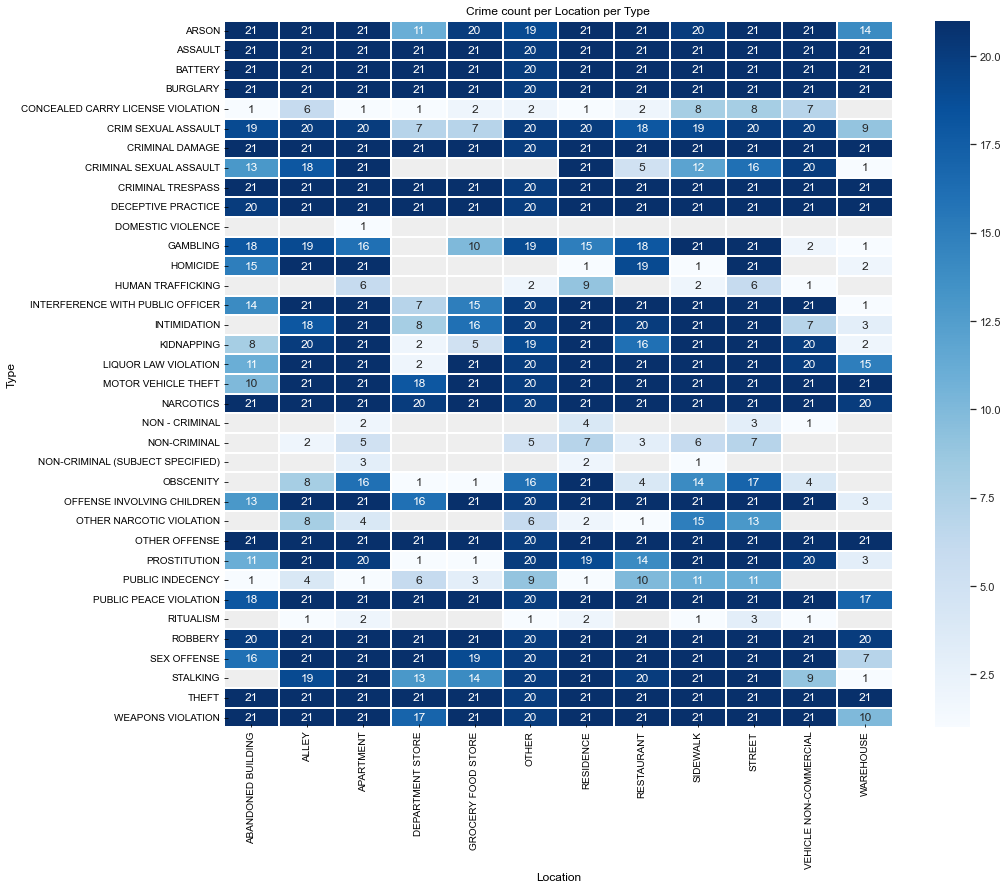

In [28]:
fig, ax = plt.subplots(figsize=(15,13))
sns.set(font_scale=1.0)
sns.heatmap(corr,
            annot=True,
           linewidths=0.2,
           cmap='Blues',
            robust=True)
plt.title('Crime count per Location per Type')